In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
import mglearn

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
heart = pd.read_csv("C:/Soongsil/4-2학기/데이터 마이닝/데마 조별/heart.csv")

In [4]:
target1 = heart.HeartDisease
feature1 = heart.drop("HeartDisease", axis = 1)

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
ct = make_column_transformer(
    (StandardScaler(), ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']),
    (OneHotEncoder(sparse = False), ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(feature1, target1,
                                                     train_size=0.7, random_state=0)


In [46]:
ct.fit(x_train, y_train)
x_train_trans = ct.fit_transform(x_train, y_train)
x_test_trans = ct.fit_transform(x_test, y_test)

# 
# 
### 상관관계 파악 / 상관관계 시각화

In [23]:
import seaborn as sns

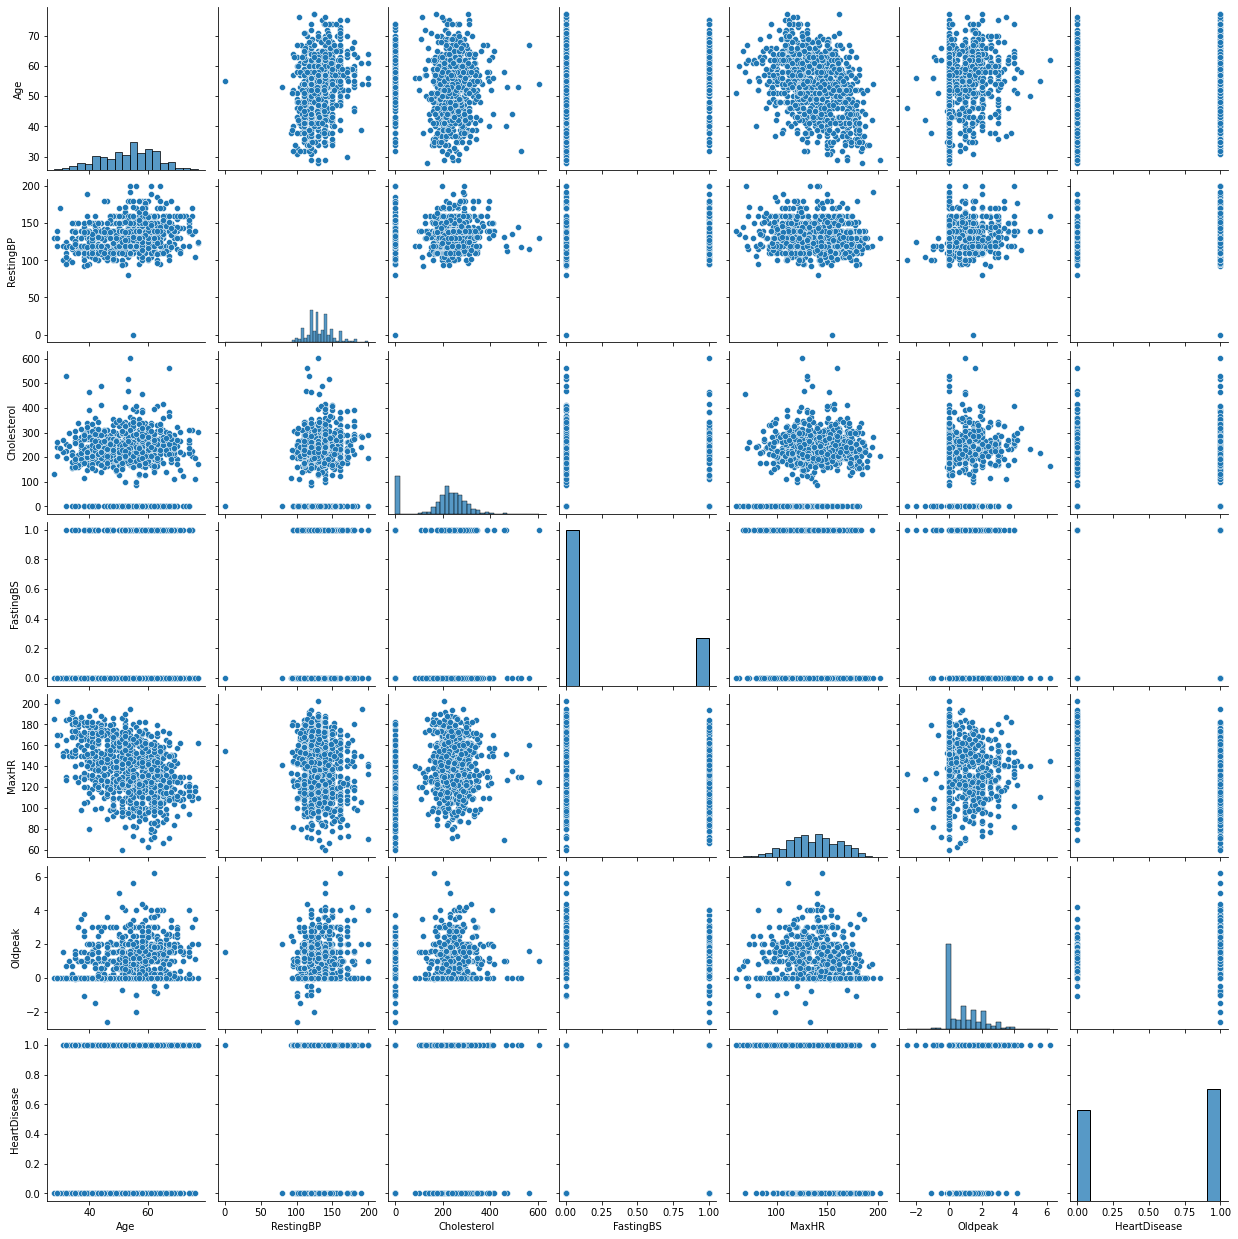

In [24]:
sns.pairplot(heart)
plt.show()

In [25]:
corr_df = heart.corr(method = 'pearson')
corr_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


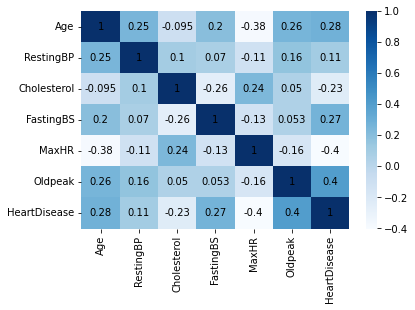

In [26]:
ax = sns.heatmap(corr_df, annot=True, 
                 annot_kws=dict(color='black'), cmap=plt.cm.Blues)
plt.show()

# 
# 
# 
## 이진분류
### 오차 행렬(Confusion Matrix)
### ```sklearn.metrics.confusion_matrix(y_true, y_pred)```
- True Negative: 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0
- False Positive: 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0
- False Negative: 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
- True Positive: 예측값을 Positive 값 1로 예측했고, 실제 값도 Positive 값 1

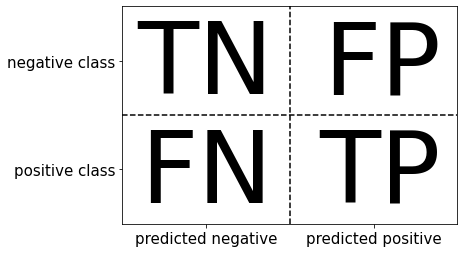

In [33]:
mglearn.plots.plot_binary_confusion_matrix()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [47]:
logreg = LogisticRegression().fit(x_train_trans, y_train)
y_pred = logreg.predict(x_test_trans)

In [48]:
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
confmat

array([[ 87,  26],
       [ 20, 143]], dtype=int64)

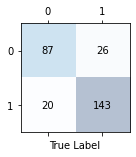

In [49]:
fig, ax = plt.subplots(figsize = (2, 5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]) :
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel("Predicted Label")
plt.xlabel("True Label")
plt.tight_layout()
plt.show()

# 
### ```sklearn.metrics.ConfusionMatrixDisplay(모형, x, y)```

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

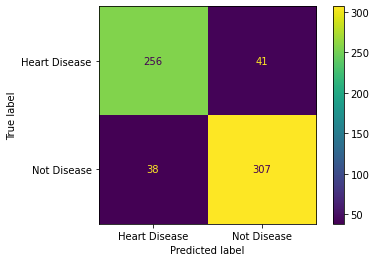

In [55]:
ConfusionMatrixDisplay.from_estimator(logreg, x_train_trans, y_train,
                                      display_labels=['Heart Disease', 'Not Disease'])
plt.show()

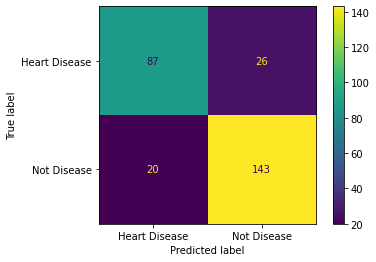

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=['Heart Disease', 'Not Disease'])
plt.show()

# 
# 
### 정확도 (Accuracy)
### ```sklearn.metrics.accuracy_score```

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [57]:
logreg = LogisticRegression().fit(x_train_trans, y_train)
y_pred = logreg.predict(x_test_trans)

In [58]:
accuracy_score(y_test, y_pred)

0.8333333333333334

# 
### 정밀도(Precision)와 재현율(Recall)
### ```sklearn.metrics.precision_score(y_true, y_pred)```
### ```sklearn.metrics.recall_score(y_true, y_pred)```
- 정밀도 = ${{TP} \over {(FP + TP)}}$
- 재현율 = ${{TP} \over {(FN + TP)}}$
- 정확도 = ${(TN + TP)} \over {(TN + FP + FN + TP)}$
- 오류율 = ${(FN + FP)} \over {(TN + FP + FN + TP)}$

In [59]:
from sklearn.metrics import precision_score, recall_score

In [60]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision, recall

(0.8461538461538461, 0.8773006134969326)

# 
### F1 Score(F-measure)
- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐

#### F점수는 정밀도와 재현율의 가중치 조화 평균

\begin{equation}
F = {{1} \over {\alpha{1 \over Precision}} + (1-\alpha){1 \over Recall}} = {{(\beta^2+1)Precision \times Recall} \over {\beta^2 Precision + Recall}}, (\beta^2 = {{1-\alpha} \over {\alpha}})
\end{equation}

# 
#### F1 Score는 가중치가 0.5일 때의 F점수

\begin{equation}
F1 = 2 \times \frac{precision \times recall}{precision + recall}
\end{equation}

### ```sklearn.metrics.f1_score(y_true, y_pred)```

In [61]:
from sklearn.metrics import f1_score

In [62]:
f1 = f1_score(y_test, y_pred)
f1

0.8614457831325302

# 
# 
### ```sklearn.metrics.classification_report(y_true, y_pred, ...)``` : 정밀도, 재현율, F1점수를 한번에 계산

In [63]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test, y_pred, 
                            target_names=['Heart Disease', 'Not Disease'], 
                            zero_division=0))

               precision    recall  f1-score   support

Heart Disease       0.81      0.77      0.79       113
  Not Disease       0.85      0.88      0.86       163

     accuracy                           0.83       276
    macro avg       0.83      0.82      0.83       276
 weighted avg       0.83      0.83      0.83       276



# 
# 
### 불확실성 고려
- **이진 분류에서 decision_function의 임계값은 0**
- **predict_proba의 임계값은 0.5로 사용**

In [69]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [77]:
X, Y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [78]:
svc = SVC(gamma=.05).fit(X_train, Y_train)

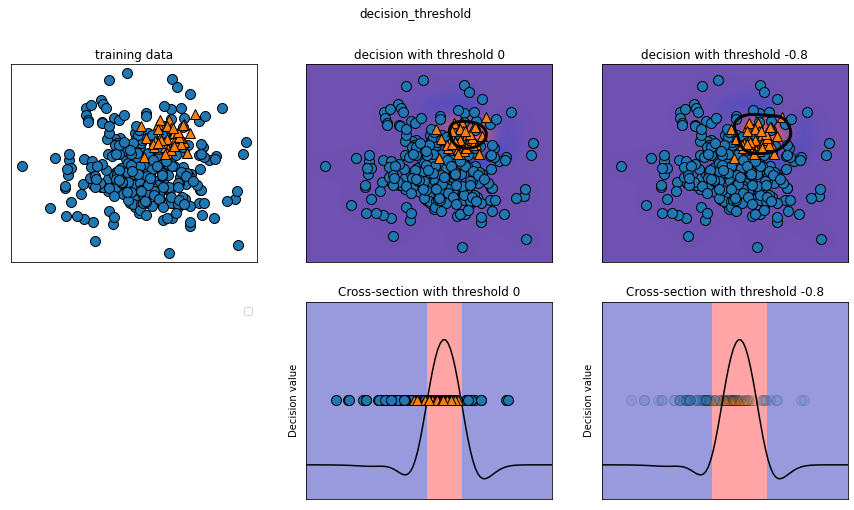

In [79]:
mglearn.plots.plot_decision_threshold()

In [80]:
print(classification_report(Y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



- **decision_function의 값이 0보다 크면 Class 1로 분류**
- **임곗값을 낮추어 Class 1의 재현율을 높이도록 예측을 조정**

In [83]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [88]:
print(classification_report(Y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



- **predict_proba의 임계값을 높이면 정밀도가 증가**

# 
# 
### 정밀도-재현율 곡선
### ```sklearn.metrics.precision_recall_curve(y_test, 양성 클래스의 확신에 대한 측정값)```
- 곡선에 각 포인트는 decision_function의 가능한 **모든 임계값**에 대응
- **곡선이 우측 위로 갈수록 더 좋은 분류기**
- **임계값이 커지면서 곡선은 정밀도가 높아지는 쪽으로 이동, 재현율은 감소**
- **임계값을 높일수록 양성으로 분류된 포인트 대부분이 TP가 됨**
- **정밀도가 매우 높아지면 재현율은 감소**
- **정밀도가 높아져도 재현율이 높게 유지될수록 더 좋은 모형**

# 
- **predict_proba가 없는 모형은, decision_function을 사용**

In [136]:
X, Y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [137]:
svc = SVC(gamma=.05).fit(X_train, Y_train)

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
precision_svc, recall_svc, thresholds_svc = \
    precision_recall_curve(Y_test, svc.decision_function(X_test))

# 
- **decision_function이 없는 모형은, predict_proba를 사용**

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2).\
    fit(X_train, Y_train)

In [142]:
precision_rf, recall_rf, thresholds_rf = \
    precision_recall_curve(Y_test, rf.predict_proba(X_test)[:, 1])

# 
- 0에 가까운 임계값

In [167]:
close_zero_svc = np.argmin(np.abs(thresholds_svc))
close_zero_rf = np.argmin(np.abs(thresholds_rf - 0.5))

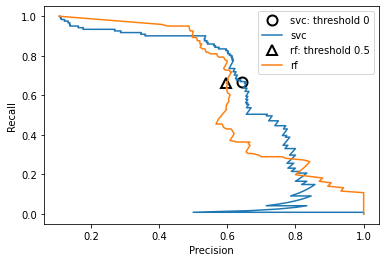

In [168]:
plt.plot(precision_svc[close_zero_svc], recall_svc[close_zero_svc], 
         'o', markersize=10,
         label='svc: threshold 0', fillstyle='none', c='k', mew=2)
plt.plot(precision_svc, recall_svc, label='svc')

plt.plot(precision_rf[close_zero_rf], recall_rf[close_zero_rf], 
         '^', markersize=10,
         label='rf: threshold 0.5', fillstyle='none', c='k', mew=2)
plt.plot(precision_rf, recall_rf, label='rf')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.show()

#### F! 점수는 정밀도-재현율 곡선의 한 지점인 기본 임계값에 대한 점수

In [169]:
f1_score(Y_test, svc.predict(X_test)), f1_score(Y_test, rf.predict(X_test))

(0.6558704453441295, 0.6097560975609757)

# 
# 
### 평균 정밀도 : 정밀도-재현율 곡선의 아랫부분 면적
### ```sklearn.metrics.average_precision_score(y_test, 양성 클래스의 확신에 대한 측정값)```

In [170]:
from sklearn.metrics import average_precision_score

In [171]:
ap_svc = average_precision_score(Y_test, svc.decision_function(X_test))
ap_rf = average_precision_score(Y_test, rf.predict_proba(X_test)[:, 1])
ap_svc, ap_rf

(0.6663140319391998, 0.659559370099291)

# 
### ```sklearn.metrics.PrecisionRecallDisplay(모형, X_test, Y_test, ax)```

In [172]:
from sklearn.metrics import PrecisionRecallDisplay

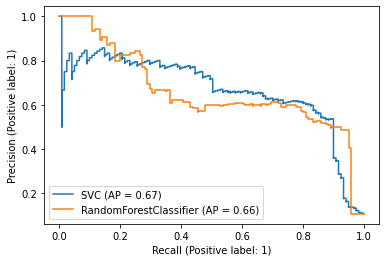

In [173]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_estimator(svc, X_test, Y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(rf, X_test, Y_test, ax=ax)
plt.show()

# 
# 
### ROC 곡선과 AUC
- ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
- AUC(Area Under Curve) 값은 ROC 곡선 밑에 면적을 구한 값 (1이 가까울수록 좋은 값)

# 
- TPR(True Positive Rate): ${{TP} \over {(FN + TP)}}$, 재현율
- TNR(True Negative Rate): ${{TN} \over {(FP + TN)}}$
- FPR(False Positive Rate): ${{FP} \over {(FP + TN)}}, (= 1 - TNR)$

### ```sklearn.metrics.roc_curve(y_true, y_pred_proba)```
### ```sklearn.metrics.roc_auc_score(y_true, y_pred)```

In [174]:
from sklearn.metrics import roc_curve

In [179]:
fpr_svc, tpr_svc, thresholds_svc = roc_curve(Y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])

In [180]:
close_zero_svc = np.argmin(np.abs(thresholds_svc))
close_zero_rf = np.argmin(np.abs(thresholds_rf - 0.5))

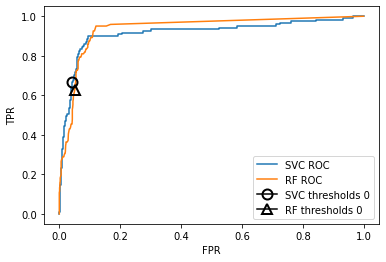

In [182]:
plt.plot(fpr_svc, tpr_svc, label='SVC ROC')
plt.plot(fpr_rf, tpr_rf, label='RF ROC')
plt.plot(fpr_svc[close_zero_svc], tpr_svc[close_zero_svc], 
         marker='o', markersize=10,
         label='SVC thresholds 0', fillstyle='none', c='k', mew=2)
plt.plot(fpr_rf[close_zero_rf], tpr_rf[close_zero_rf], 
         marker='^', markersize=10,
         label='RF thresholds 0', fillstyle='none', c='k', mew=2)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

# 
### ```sklearn.metrics.RocCurveDisplay()```

In [185]:
from sklearn.metrics import RocCurveDisplay

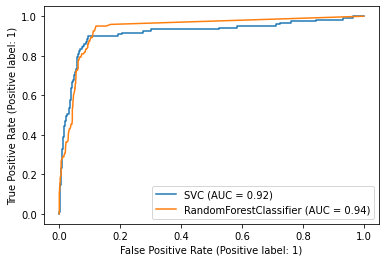

In [186]:
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(svc, X_test, Y_test, ax=ax)
RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax)
plt.show()

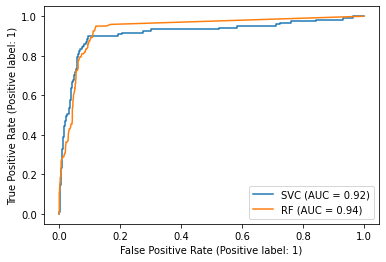

In [187]:
fig, ax = plt.subplots()

RocCurveDisplay.from_predictions(Y_test, svc.decision_function(X_test),
                                 name='SVC', ax=ax)
RocCurveDisplay.from_predictions(Y_test, rf.predict_proba(X_test)[:, 1],
                                 name='RF', ax=ax)
plt.show()

# 
# 

In [183]:
from sklearn.metrics import roc_auc_score

In [184]:
rf_auc = roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(Y_test, svc.decision_function(X_test))
svc_auc, rf_auc

(0.9162935036712654, 0.9366953672911659)

# 
# 
# 
### 다중 분류의 평가 지표
- 다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가 지표는 F1 점수
- **F1 점수는 한 클래스를 양성 클래스로 두고, 나머지를 모두 음성으로 간주하여 계산**
    - 'macro average' : 클래스별 F1점수에 가중치를 주지 않음, 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룸
    - 'weighted average' : 클래스별 샘플 수로 가중치를 두어, F1 점수의 평균을 계산
    - 'micro average' : 모든 클래스의 FP, FN, TP의 총 수를 헤아린 다음, 정밀도, 재현율 F1 점수를 계산

In [199]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [200]:
digits = load_digits()

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, random_state=0)

In [202]:
lr = LogisticRegression(max_iter=1000).fit(X_train, Y_train)
pred = lr.predict(X_test)

In [203]:
accuracy_score(Y_test, pred)

0.9511111111111111

In [204]:
confusion_matrix(Y_test, pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  1,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 44]], dtype=int64)

In [205]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.91      0.91        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.96      0.98      0.97        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [207]:
f1_score(Y_test, pred, average='micro'), f1_score(Y_test, pred, average='macro')

(0.9511111111111111, 0.9520660108736191)

# 
# 
### 모형 선택에서 평가 지표 사용
- ```cross_val_score()```와 ```GridSearchCV()```의 ```scoring```을 지정 ('accuracy' / 'roc_auc' / 'recall_macro' 등)

In [219]:
from sklearn.model_selection import cross_val_score, cross_validate

In [220]:
cross_val_score(SVC(), x_train_trans, y_train, cv=5)

array([0.84496124, 0.86046512, 0.8984375 , 0.8671875 , 0.8671875 ])

In [221]:
cross_val_score(SVC(), x_train_trans, y_train, scoring='roc_auc', cv=5)

array([0.93309179, 0.90990338, 0.96511914, 0.92901007, 0.92311471])

In [222]:
res = cross_validate(SVC(), x_train_trans, y_train,
                     scoring = ['accuracy', 'roc_auc', 'recall_macro'],
                     return_train_score=True, cv=5)

In [223]:
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.022133,0.029852,0.844961,0.916179,0.933092,0.965587,0.838768,0.914649
1,0.015958,0.017978,0.860465,0.931774,0.909903,0.974225,0.858696,0.930334
2,0.032354,0.041075,0.898438,0.906615,0.965119,0.965093,0.898428,0.904077
3,0.024716,0.026722,0.867188,0.918288,0.929010,0.968259,0.860845,0.916393
4,0.013185,0.016958,0.867188,0.922179,0.923115,0.968076,0.865758,0.919727


# 
# 

In [224]:
from sklearn.model_selection import GridSearchCV

In [236]:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3).fit(x_train_trans, y_train)

grid.best_params_, grid.best_score_, \
    average_precision_score(y_test, grid.decision_function(x_test_trans)), \
    grid.score(x_test_trans, y_test)

({'gamma': 0.1}, 0.8753894080996885, 0.9377703376061884, 0.8586956521739131)

In [238]:
grid = GridSearchCV(SVC(), param_grid=param_grid, 
                    cv=3, scoring='average_precision').fit(x_train_trans, y_train)

grid.best_params_, grid.best_score_, \
    average_precision_score(y_test, grid.decision_function(x_test_trans)), \
    grid.score(x_test_trans, y_test)

({'gamma': 0.01}, 0.9309518750966981, 0.9390979598645199, 0.9390979598645199)